# Nama : Satrio Adjie Wicaksono
# NIM : 231011400145
# Tugas implementasi Artifical Neural Network (ANN)

# Data Loading

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import joblib  

# --- 1. Load Dataset ---
filename_csv = 'features_mobil_motor.csv'

try:
    df = pd.read_csv(filename_csv)
    print(f"Berhasil membaca dataset: {filename_csv}")
except FileNotFoundError:
    print(f"Error: File '{filename_csv}' tidak ditemukan!")

# Cek sebaran data
print("\nJumlah Data per Kelas:")
print(df['label'].value_counts())

# --- 2. Memisahkan Fitur (X) dan Label (y) ---
X = df.drop(['filename', 'label'], axis=1).values
y = df['label'].values

# --- 3. Split Data (80% Training, 20% Testing) ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# --- 4. Standard Scaling & MENYIMPAN SCALER ---
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Simpan scaler ke dalam file .pkl sesuai instruksi gambar
joblib.dump(scaler, 'scaler.pkl') 
print(f"Scaler berhasil disimpan menjadi file: scaler.pkl")

print(f"\nSiap Training!")
print(f"Data Latih : {X_train.shape[0]} gambar")
print(f"Data Uji   : {X_test.shape[0]} gambar")
print(f"Jumlah Fitur: {X_train.shape[1]}")

Berhasil membaca dataset: features_mobil_motor.csv

Jumlah Data per Kelas:
label
0    100
1    100
Name: count, dtype: int64
Scaler berhasil disimpan menjadi file: scaler.pkl

Siap Training!
Data Latih : 160 gambar
Data Uji   : 40 gambar
Jumlah Fitur: 1918


# Arsitektur ANN

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# Inisialisasi Model
model = Sequential()

# --- Input Layer & Hidden Layer 1 ---
# input_shape otomatis menyesuaikan jumlah fitur kamu (sekitar 1918 fitur)
model.add(Dense(128, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dropout(0.3)) # Dropout mematikan 30% neuron acak agar tidak overfitting

# --- Hidden Layer 2 ---
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.3))

# --- Hidden Layer 3 ---
model.add(Dense(32, activation='relu'))

# --- Output Layer ---
# Gunakan 1 neuron & 'sigmoid' karena ini klasifikasi biner (Mobil vs Motor)
# Jika nilainya mendekati 0 = Mobil, mendekati 1 = Motor
model.add(Dense(1, activation='sigmoid'))

# Tampilkan struktur model
model.summary()

c:\Python313\Lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │       245,632 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 256,001 (1000.00 KB)

 Trainable params: 256,001 (1000.00 KB)

 Non-trainable params: 0 (0.00 B)

# Training model

In [5]:
# --- Kompilasi Model ---
model.compile(optimizer='adam',
              loss='binary_crossentropy', # Wajib untuk 2 kelas (0 dan 1)
              metrics=['accuracy'])

# --- Mulai Training ---
print("Mulai Training...")
history = model.fit(X_train, y_train,
                    validation_data=(X_test, y_test),
                    epochs=50,       # Komputer belajar materi sebanyak 50 kali putaran
                    batch_size=32,   # Sekali belajar ambil 32 data
                    verbose=1)

Mulai Training...
Epoch 1/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 68ms/step - accuracy: 0.7625 - loss: 0.5092 - val_accuracy: 0.9250 - val_loss: 0.2279
Epoch 2/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.9312 - loss: 0.1500 - val_accuracy: 0.9750 - val_loss: 0.1201
Epoch 3/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.9750 - loss: 0.0820 - val_accuracy: 0.9750 - val_loss: 0.0792
Epoch 4/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.9875 - loss: 0.0321 - val_accuracy: 0.9750 - val_loss: 0.0636
Epoch 5/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.9937 - loss: 0.0347 - val_accuracy: 0.9750 - val_loss: 0.0638
Epoch 6/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 1.0000 - loss: 0.0095 - val_accuracy: 0.9750 - val_loss: 0.0690
Epoch 7/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 1.0000 - loss: 0.0129 - val_accuracy: 0.9750 - val_loss: 0.0780
Epoch 8/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 1.0000 - loss: 0.0068 - val_accuracy: 0.9750 -

# evaluasi model

In [6]:
# Evaluasi menggunakan data test
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)

print(f"\n--- HASIL AKHIR PADA DATA TEST ---")
print(f"Loss (Tingkat Kesalahan) : {loss:.4f}")
print(f"Accuracy (Tingkat Akurasi): {accuracy*100:.2f}%")

if accuracy > 0.8:
    print("Kesimpulan: Model sangat bagus! 🌟")
elif accuracy > 0.6:
    print("Kesimpulan: Model lumayan, tapi masih bisa ditingkatkan.")
else:
    print("Kesimpulan: Model masih bingung, perlu tambah data atau tuning lagi.")


--- HASIL AKHIR PADA DATA TEST ---
Loss (Tingkat Kesalahan) : 0.1379
Accuracy (Tingkat Akurasi): 97.50%
Kesimpulan: Model sangat bagus! 🌟


# Visualisasi grafik

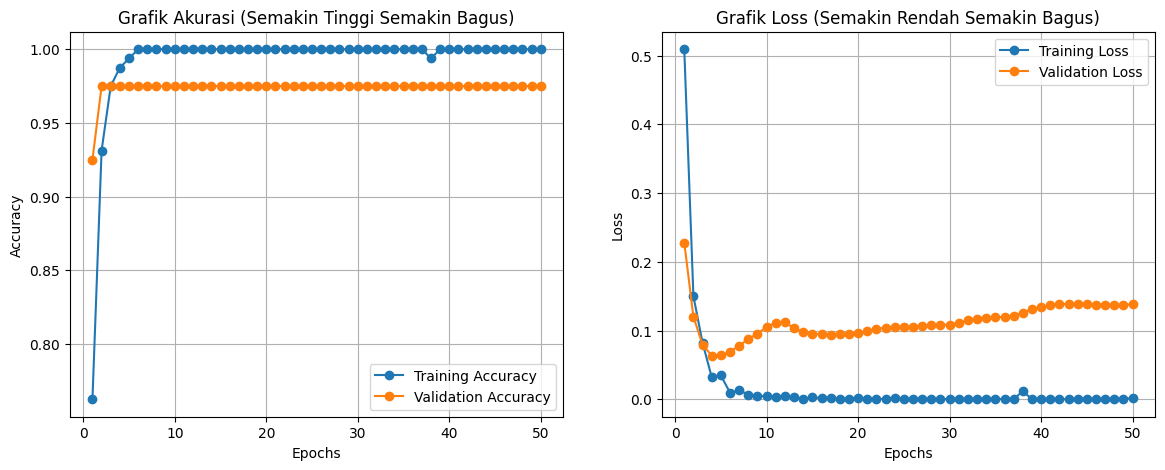

In [7]:
import matplotlib.pyplot as plt

# Ambil data history dari proses training
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(1, len(acc) + 1)

plt.figure(figsize=(14, 5))

# --- Grafik 1: Akurasi ---
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy', marker='o')
plt.plot(epochs_range, val_acc, label='Validation Accuracy', marker='o')
plt.title('Grafik Akurasi (Semakin Tinggi Semakin Bagus)')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.grid(True)

# --- Grafik 2: Loss ---
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss', marker='o')
plt.plot(epochs_range, val_loss, label='Validation Loss', marker='o')
plt.title('Grafik Loss (Semakin Rendah Semakin Bagus)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.grid(True)

plt.show()

# Save model

In [8]:
# Simpan model ke format .h5
nama_file_model = 'model_klasifikasi_mobil_motor.h5'
model.save(nama_file_model)

print(f"Model berhasil disimpan! Nama file: {nama_file_model}")
print("Jangan lupa download file .h5 dan .csv nya untuk dikumpulkan.")

Model berhasil disimpan! Nama file: model_klasifikasi_mobil_motor.h5
Jangan lupa download file .h5 dan .csv nya untuk dikumpulkan.
